In [92]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, LeaveOneOut, cross_validate
import matplotlib.pyplot as plt
import seaborn as sns
import string
import math
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer,StandardScaler, MinMaxScaler, RobustScaler,KBinsDiscretizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin


RANDOM_STATE = 1234

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
d2 = pd.read_csv("/content/drive/MyDrive/SUBJECT/COMPSCI_762/a3/D2.csv")
d3 = pd.read_csv("/content/drive/MyDrive/SUBJECT/COMPSCI_762/a3/D3.csv")

## Helper function

In [95]:
def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

def print_confusion_matrix(y_pred, y_test):
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Score:",round(accuracy_score(y_test, y_pred)*100,3))
    print("Classification Report:\n",classification_report(y_test,y_pred))
    
def compare(m1, m2, X, y):
    p_, m1_est_acc, m2_est_acc = [], [], []
    kf = KFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)
    for train_index, test_index in kf.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        m1.fit(X_train, y_train)
        m2.fit(X_train, y_train)
        acc1 = accuracy_score(y_test, m1.predict(X_test))
        acc2 = accuracy_score(y_test, m2.predict(X_test))
        m1_est_acc.append(acc1)
        m2_est_acc.append(acc2)
        p_.append(acc1 - acc2)
    
    t, p = paired_t_test(p_)
    print("Cross Validated Paired t-test")
    print("est_acc_m1: ", np.mean(m1_est_acc), "   est_acc_m2:", np.mean(m2_est_acc))
    print(f"t statistic: {t}, p-value: {p}\n")

def paired_t_test(p):
    p_hat, n  = np.mean(p), len(p)
    den = np.sqrt(sum([(diff - p_hat)**2 for diff in p]) / (n - 1))
    t = (p_hat * (n**(1/2))) / den
    p_value = t_dist.sf(t, n-1)*2
    return t, p_value

# Task 1

## 1.1 Design a dataset with at least 50 points for which the selection of C in a linear SVM makes a difference.

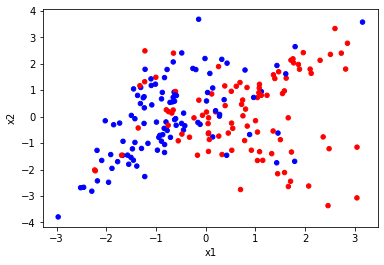

In [153]:
import numpy as np
from sklearn.svm import SVC
X, y = make_classification(n_samples=200, 
                           n_features=2,
                           n_informative=2, 
                           n_redundant=0,
                           n_classes=2,
                           random_state=RANDOM_STATE, 
                           flip_y=0.3)



## Creating dataframe and save to CSV
df = pd.DataFrame(X, columns= ['x1', 'x2'])
df['class'] = y
colors = { 1:'red', 0:'blue'}
df.plot(x="x1", y="x2",kind="scatter", c=(df["class"].map(colors)), colormap="YlOrRd")
df.to_csv("input_data_set.csv")

X = pd.DataFrame(X, columns= ['x1', 'x2'])


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                   test_size=0.3, stratify=y,
                                   random_state=RANDOM_STATE)





A Data set is generated using the `make_classificaiton` method in sklearn. In order to mae a data set that performace affect on the parameter C. It is decided to have a small number of points, (n=200) and no redundant cluster.
Since the C affects the decision boundary, the noise contain in the data highly affected the outcome. It is tested with multiple parameter, and a 0.3 flip random rate appears to be channging for large Cs.

The dataset is then exported as csv. To save some time, the Train_test split is already done during the inital generation of the dataset.


## 1.2 Load the data set (your own data set), train an SVM with a linear kernel on the full data set, and plot the data set with the decision boundary.

In [154]:
def plot_decision_boundary(svc_model, X_train, y_train):
  """
  helper function to plot the decision boundary, this is
  """
  plt.figure(figsize=(10, 8))
  sns.scatterplot(x=X_train["x1"], 
                  y=X_train["x2"], 
                  hue=y_train, 
                  s=8);        
  w, b = svc_model.coef_[0], svc_model.intercept_[0]      
  x_points = np.linspace(-1, 1)   
  y_points = -(w[0] / w[1]) * x_points - b / w[1]  
  plt.plot(x_points, y_points, c='r');

  # Encircle support vectors
  plt.scatter(svc_model.support_vectors_[:, 0],
              svc_model.support_vectors_[:, 1], 
              s=50, 
              facecolors='none', 
              edgecolors='k', 
              alpha=.5);

  w_hat = svc_model.coef_[0] / (np.sqrt(np.sum(svc_model.coef_[0] ** 2)))

  margin = 1 / np.sqrt(np.sum(svc_model.coef_[0] ** 2))
  print("klajsflkds")
  decision_boundary_points = np.array(list(zip(x_points, y_points)))
  points_of_line_above = decision_boundary_points + w_hat * margin
  points_of_line_below = decision_boundary_points - w_hat * margin

  plt.plot(points_of_line_above[:, 0], 
          points_of_line_above[:, 1], 
          'b--', 
          linewidth=2)
  plt.plot(points_of_line_below[:, 0], 
          points_of_line_below[:, 1], 
          'g--',
          linewidth=2)
  

training accuracy = 0.8
klajsflkds


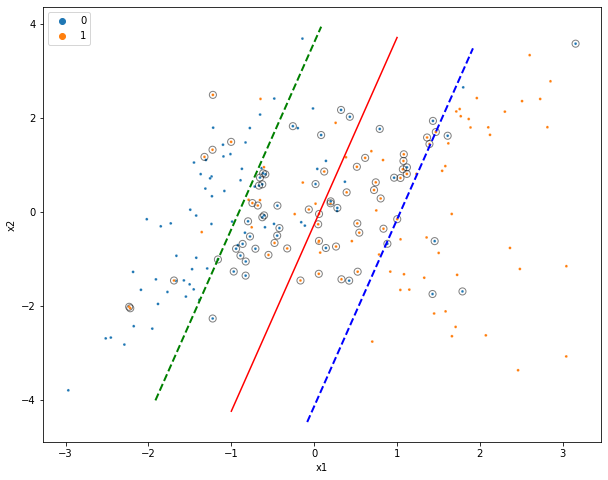

In [155]:
svc_model = SVC(kernel='linear', random_state=RANDOM_STATE, C=1)
svc_model.fit(X_train, y_train)
print(f'training accuracy = {svc_model.score(X_train,y_train)}')
plot_decision_boundary(svc_model, X, y)

## 1.3 Carry out a leave-1-out cross-validation with an SVM on your dataset. Report the train and test performance. Train performance in this case is the performance on the training set, test performance, the performance of the leave-1-out cross-validation.

In [157]:
model = SVC(kernel='linear', random_state=RANDOM_STATE, C=1)


scores = cross_validate(model, X, y, n_jobs=-1, cv=LeaveOneOut(), return_train_score=True)

for metric_name in scores.keys():
  average_score = np.average(scores[metric_name])
  print('%s : %f' % (metric_name, average_score))

fit_time : 0.005231
score_time : 0.002290
test_score : 0.790000
train_score : 0.794523


## 1.4 Improve the SVM by changing C. Plot the data set and resulting decision boundary, give the performance.

training accuracy = 0.7928571428571428
klajsflkds


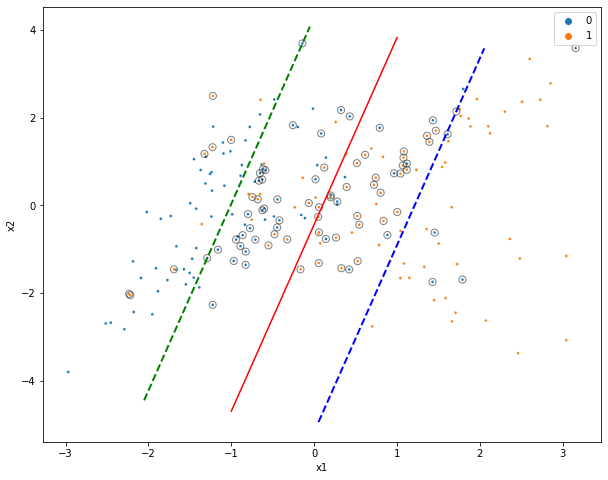

In [158]:
svc_model = SVC(kernel='linear', random_state=RANDOM_STATE, C=0.2)
svc_model.fit(X_train, y_train)
print(f'training accuracy = {svc_model.score(X_train,y_train)}')
# print_confusion_matrix(svc_model.predict(X_test),y_test)
plot_decision_boundary(svc_model, X, y)

## Leave one out cross validation

In [159]:
model = SVC(kernel='linear', random_state=RANDOM_STATE, C=0.2)
scores = cross_validate(
    model,
    X, 
    y, 
    n_jobs=-1, 
    cv=LeaveOneOut(), 
    return_train_score=True)

for metric_name in scores.keys():
  average_score = np.average(scores[metric_name])
  print('%s : %f' % (metric_name, average_score))

fit_time : 0.004823
score_time : 0.002368
test_score : 0.795000
train_score : 0.795000


A small C is chosen randomly to evaluvate if there's any performance difference. The motivation of choose a small C is because the inital data generation was done with more noise. Thus a smaller C is choosen


The result is as shown above, 

# Result

### Model 1 with C = 1.0 (denoting M1)

M1 train accuracy = 0.80  
M1 test accuracy = 0.790


### Model 2 with C = 0.2 (denoting M2)

M2 train accuracy = 0.792  
M12 test accuracy = 0.795  


## 1.5 Explain what C does and how it improved the SVM in this case.

C parameter in support vector machine is a penalty parameter of the error terms. This servers as a regulaization terms that benefits simple weight. With smaller C, the points that are allow to be missclassified increase, this incresae the margin space that the decison boundary can make. On the other hand, large C only allows a few poinst to be missclassified. T
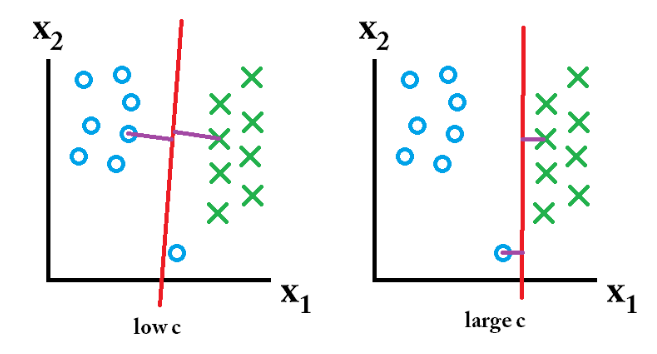

The dataset generated although is learnly separable, because of the noised that is added in, model with large C which does not allows any points to be misclassified might result in an overfit of the model. As shown above, Althoguh
M1 have higher train accuray, M1 score worse compare to M2 regarding test accuarcy.

# Task 2

## 2.1 Repeat step 1.2 and 1.3 from above with DS2. You can change the leave-1-out cross validation to something different. If you do so, explain what you did and why you chose this way evaluating.

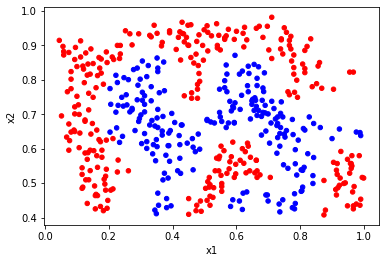

In [164]:

df = d2
df.columns = ['x1', 'x2', 'class']
colors = {-1:'blue', 1:'red', 0:'green'}
df.plot(x="x1", y="x2",kind="scatter", c=(df["class"].map(colors)), colormap="YlOrRd")

The data does not look like it's linearly separable

## Training linear SVM

In [165]:
X = df[['x1','x2']]
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                   test_size=0.3, stratify=y,
                                   random_state=RANDOM_STATE)



In [166]:
svc_model = SVC(kernel='linear', random_state=RANDOM_STATE, C=0.2)
svc_model.fit(X_train, y_train)
print(f'training accuracy = {svc_model.score(X_train,y_train)}')

training accuracy = 0.5730659025787965


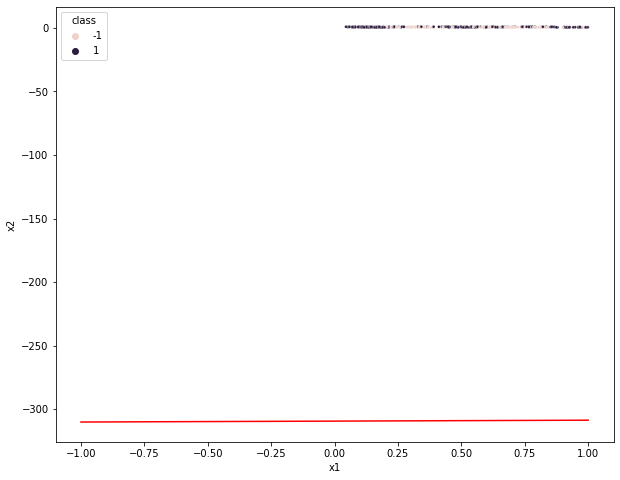

In [167]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train['x1'], 
                y=X_train['x2'], 
                hue=y_train, 
                s=8);

w = svc_model.coef_[0]           
b = svc_model.intercept_[0]      
x_points = np.linspace(-1, 1)   
y_points = -(w[0] / w[1]) * x_points - b / w[1]  
plt.plot(x_points, y_points, c='r');

This doesn't look too well, so a area aproach is used.

In [168]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets



def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_decision_area(X, clf):
  fig, ax = plt.subplots(figsize=(10, 8))
  # title for the plots
  title = ('Decision surface of linear SVC ')
  # Set-up grid for plotting.
  X0, X1 = X["x1"], X["x2"]
  xx, yy = make_meshgrid(X0, X1)

  plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
  ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
  ax.set_ylabel('x1')
  ax.set_xlabel('x2')
  ax.set_xticks(())
  ax.set_yticks(())
  ax.set_title(title)
  ax.legend()
  plt.show()




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
No handles with labels found to put in legend.


training accuracy = 0.5730659025787965


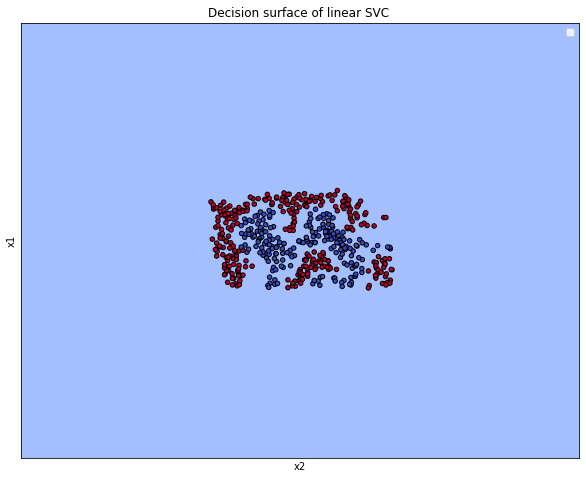

In [169]:
model = svm.SVC(kernel='linear')
clf = model.fit(X, y)
print(f'training accuracy = {model.score(X_train,y_train)}')
plot_decision_area(X,clf)



## Cross validation

In [170]:
model = SVC(kernel='linear', random_state=RANDOM_STATE, C=1)


scores = cross_validate(model, X, y, n_jobs=-1, cv=LeaveOneOut(), return_train_score=True)

for metric_name in scores.keys():
  average_score = np.average(scores[metric_name])
  print('%s : %f' % (metric_name, average_score))

fit_time : 0.012653
score_time : 0.002125
test_score : 0.573146
train_score : 0.573146


## 2.2 Pick a kernel which will improve the SVM, plot the data set and resulting decision boundary, give the performance.

training accuracy = 0.8681948424068768


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
No handles with labels found to put in legend.


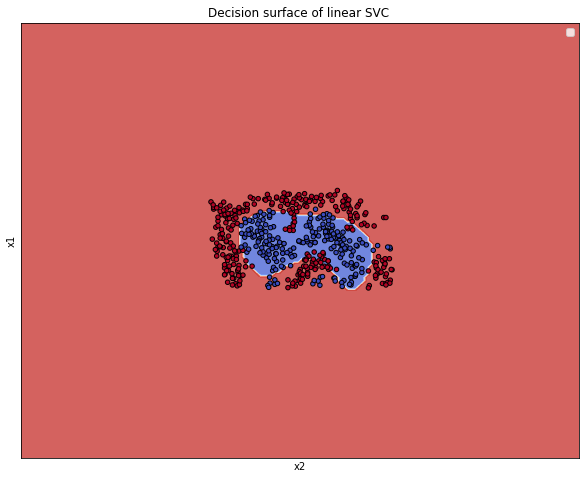

In [171]:
model = svm.SVC(kernel='rbf')
clf = model.fit(X, y)
print(f'training accuracy = {model.score(X_train,y_train)}')
plot_decision_area(X,clf)





In [172]:
model = SVC(kernel='rbf', random_state=RANDOM_STATE, C=1)


scores = cross_validate(model, X, y, n_jobs=-1, cv=LeaveOneOut(), return_train_score=True)

for metric_name in scores.keys():
  average_score = np.average(scores[metric_name])
  print('%s : %f' % (metric_name, average_score))

fit_time : 0.015091
score_time : 0.002130
test_score : 0.851703
train_score : 0.863876


The linear model result in a test_score : 0.573146 and a train_score : 0.573146

On the other hand, the model with other kernel result in a training accuracy = 0.8681948424068768 and test_score : 0.851703.


Which is cearly a improvement compare to the first model

## 2.3 Explain which kernel you chose and why.

The rbf, Radia Basis FUnction kernel is choose for the result. This is because judging by the data set, it is clearly not lineraly seperable. RBF kernels function uses 2 poinst and compute hte similarity or how close they are to each other.

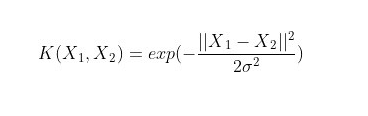

The RBF kernel is a proular kernel that resember K-Nearset Neigbhour, this allows use to look at higher demension data/ non linear data and still out put a meaningful disntance from the boundary.

# Task 3

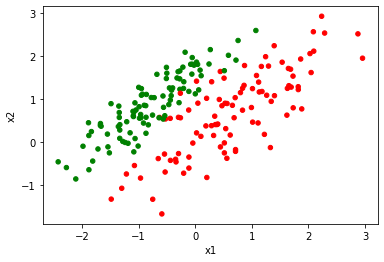

In [173]:
df = d3
df.columns = ['x1', 'x2', 'class']
colors = {-1:'blue', 1:'red', 0:'green'}
df.plot(x="x1", y="x2",kind="scatter", c=(df["class"].map(colors)), colormap="YlOrRd")


In [174]:
X = df[['x1','x2']]
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                   test_size=0.3, stratify=y,
                                   random_state=RANDOM_STATE)

## 3.1 Repeat step 1.2 and 1.3 from above with DS3. You can change the leave-1-out cross validation to something different. If you do so, explain what you did and why you chose this way evaluating.

training accuracy = 0.9496402877697842
klajsflkds


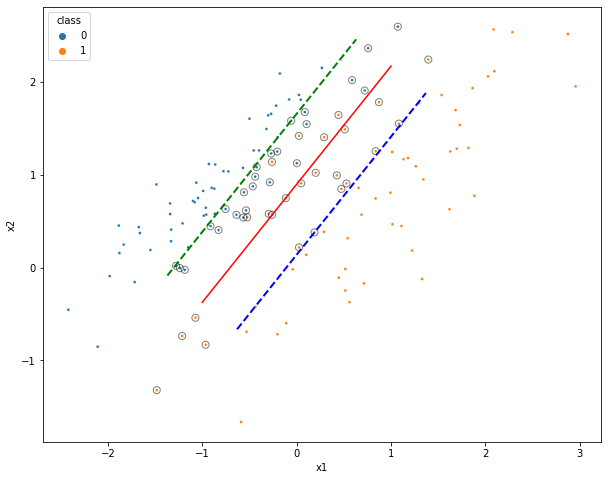

In [175]:
svc_model = SVC(kernel='linear', random_state=RANDOM_STATE, C=0.2)
svc_model.fit(X_train, y_train)
print(f'training accuracy = {svc_model.score(X_train,y_train)}')
# print_confusion_matrix(svc_model.predict(X_test),y_test)
plot_decision_boundary(svc_model, X_train, y_train)

In [176]:
scores = cross_validate(model, X, y, n_jobs=-1, cv=LeaveOneOut(), return_train_score=True)

for metric_name in scores.keys():
  average_score = np.average(scores[metric_name])
  print('%s : %f' % (metric_name, average_score))

fit_time : 0.004640
score_time : 0.002364
test_score : 0.944724
train_score : 0.964088


## 3.2 Pick a kernel and 2 parameters and optimize, optimize the parameters (similar to Assignment 1), plot again data set and decision boundary and give the performance.

In [180]:
# Grid search

svm_model = SVC(kernel='linear')

grid_param = {"C": (0.1, 0.1,0.2, 0.25,0.5,0.75,1,2,5,10),
              "kernel" : ("linear", "poly", "rbf", "sigmoid"),
              "gamma" : (2**(-15), 2**(-13),2**(-11), 2**(-9) ,2**(-5), 2**(-3), 2**(1), 2**3 )}

grid_search = GridSearchCV(svm_model, param_grid=grid_param, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


{'C': 1, 'gamma': 3.0517578125e-05, 'kernel': 'linear'}

training accuracy = 0.9640287769784173
klajsflkds


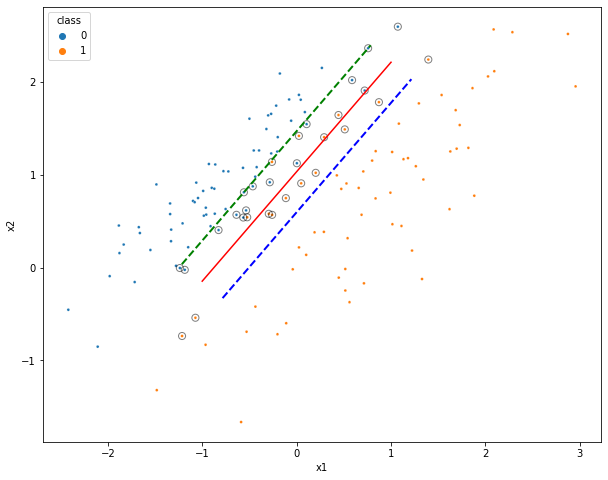

In [182]:
svc_model = SVC(kernel='linear', random_state=RANDOM_STATE, C=1, gamma = 2**(-15))
svc_model.fit(X_train, y_train)
print(f'training accuracy = {svc_model.score(X_train,y_train)}')
# print_confusion_matrix(svc_model.predict(X_test),y_test)
plot_decision_boundary(svc_model, X_train, y_train)

In [183]:
svc_model = SVC(kernel='linear', random_state=RANDOM_STATE, C=1, gamma = 2**(-15))
scores = cross_validate(svc_model, X, y, n_jobs=-1, cv=LeaveOneOut(), return_train_score=True)

for metric_name in scores.keys():
  average_score = np.average(scores[metric_name])
  print('%s : %f' % (metric_name, average_score))

fit_time : 0.004434
score_time : 0.002439
test_score : 0.964824
train_score : 0.964824


The result is test_score : 0.964824, The train_score : 0.964824 for the hyper tuned linear model, the non-tuned one have a test_score : 0.944724
train_score : 0.964088.

## 3.3 Explain the results of the previous step.

The paramerter picked is gamma, and C, and the kernel is also done by grid search. The serach range is taken inspiration by `A Practical Guid to SVC, [Hsu, Chang, Lin 2016]` (https://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf)


## Kernel choice
THe kernel is choosen by grid searching it, the result make sence since the data looks linearly sepearable. Higher depenmension data might overfit to the training set roughly then represeting the nature of the data.



## C 
C is an important regulaizqation parameter that trade training acc and testing acc. This is explained in the task 2 of the assignment.

## Gamma 

The behavior of the model is very sensitive to the gamma parameter. If gamma is too large, the radius of the area of influence of the support vectors only includes the support vector itself and no amount of regularization with C will be able to prevent overfitting.

When gamma is very small, the model is too constrained and cannot capture the complexity or “shape” of the data. The region of influence of any selected support vector would include the whole training set. The resulting model will behave similarly to a linear model with a set of hyperplanes that separate the centers of high density of any pair of two classes.




In [ ]:
## !jupyter nbconvert --to html /content/a2.ipynb